<a href="https://colab.research.google.com/github/tomhyhan/noodles/blob/main/pasta_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import userdata
from google.colab import auth

auth.authenticate_user()
token = userdata.get('token')
username = userdata.get('username')
repo_name = "noodles"

In [3]:
import os

!git clone https://github.com/tomhyhan/{repo_name}.git

if os.getcwd() != f"/content/{repo_name}":
    %cd {repo_name}
!git pull
!pwd


fatal: destination path 'noodles' already exists and is not an empty directory.
/content/noodles
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 509.09 KiB | 8.48 MiB/s, done.
From https://github.com/tomhyhan/noodles
   e590a06..8681f46  main       -> origin/main
Updating e590a06..8681f46
Fast-forward
 pasta_classification.ipynb | 7851 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++------
 1 file changed, 7114 insertions(+), 737 deletions(-)
/content/noodles


In [4]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import sys

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "noodles"

GOOGLE_DRIVE_PATH = os.path.join("..", "drive", "My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)


In [6]:

from model.utils import test_colab
test_colab()


Hello Colab! from Noodles ha


In [7]:
!pip install torchinfo
!pip install imagehash

In [8]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold


from config.config_manager import ConfigManager
from collections import Counter
from model.data_model import PastaData, create_train_transforms, create_test_transforms
from model.train import trainer, create_model
from model.utils import reset_seed, save_model
from model.data import CLASS_ENCODER, create_csv
from model.viz import class_imbalance, draw_loss, draw_train_val_accuracy

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [9]:
config_manager = ConfigManager("./config/config.yml")

SEED = config_manager.config.seed

In [10]:
reset_seed(SEED)

In [11]:
image_path = os.path.join(GOOGLE_DRIVE_PATH, "images")
csv_file_path = os.path.join(GOOGLE_DRIVE_PATH, "pasta_data.csv")

if not os.path.exists(csv_file_path):
    create_csv(image_path, csv_file_path)

In [12]:
data = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, "./pasta_data.csv"))
image_paths, labels = data["img_path"], data["label"]

X, test_data, y, test_label = train_test_split(image_paths.values, labels.values, train_size=0.9, random_state=SEED, shuffle=True, stratify=labels)

5032 1259


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Downloading: "https://download.pytorch.org/models/maxvit_t-bc5ab103.pth" to /root/.cache/torch/hub/checkpoints/maxvit_t-bc5ab103.pth
100%|██████████| 119M/119M [00:07<00:00, 15.8MB/s]


Epoch 1/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.864104326281614e-05]
Epoch 1 Loss: 2.7155269241333007 Train Accuracy: 0.3658             Validation Accuracy: 0.30666666666666664
Global gradient norm: 1.5552019531836052


Epoch 2/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.952989206823863e-05]
Epoch 2 Loss: 2.058673773606618 Train Accuracy: 0.7994             Validation Accuracy: 0.7625
Global gradient norm: 2.9331957744496804


Epoch 3/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.178746733646638e-05]
Epoch 3 Loss: 1.5867520833015443 Train Accuracy: 0.8608             Validation Accuracy: 0.8141666666666667
Global gradient norm: 2.908886308123083


Epoch 4/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [6.706766368180335e-05]
Epoch 4 Loss: 1.5037711687882742 Train Accuracy: 0.9014             Validation Accuracy: 0.84
Global gradient norm: 2.3353165648492475


Epoch 5/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [3.556912843420131e-05]
Epoch 5 Loss: 1.4335230954488118 Train Accuracy: 0.9194             Validation Accuracy: 0.8616666666666667
Global gradient norm: 2.671077497812604


Epoch 6/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.802221656231811e-06]
Epoch 6 Loss: 1.441653583049774 Train Accuracy: 0.9252             Validation Accuracy: 0.8658333333333333
Global gradient norm: 9.357719485445367


Epoch 7/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [8.567333007890797e-10]
Epoch 7 Loss: 1.3445409333705902 Train Accuracy: 0.9286             Validation Accuracy: 0.8633333333333333
Global gradient norm: 1.9053711847299306
End of Training for maxvit Model 0-fold
best accuracy: 0.8658333333333333


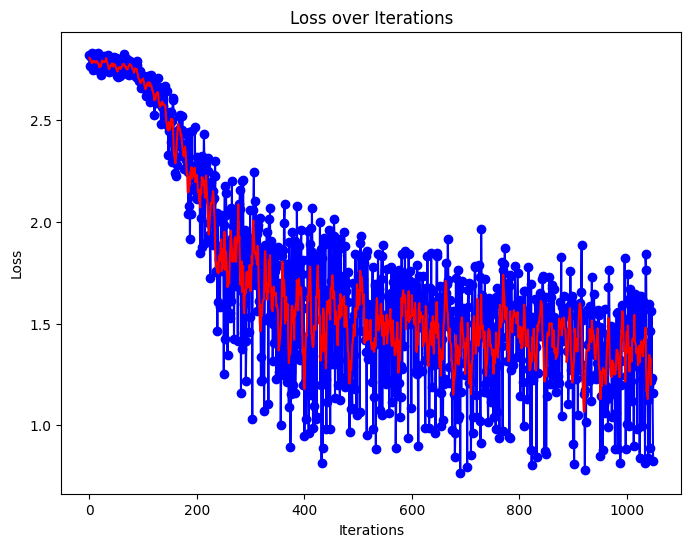

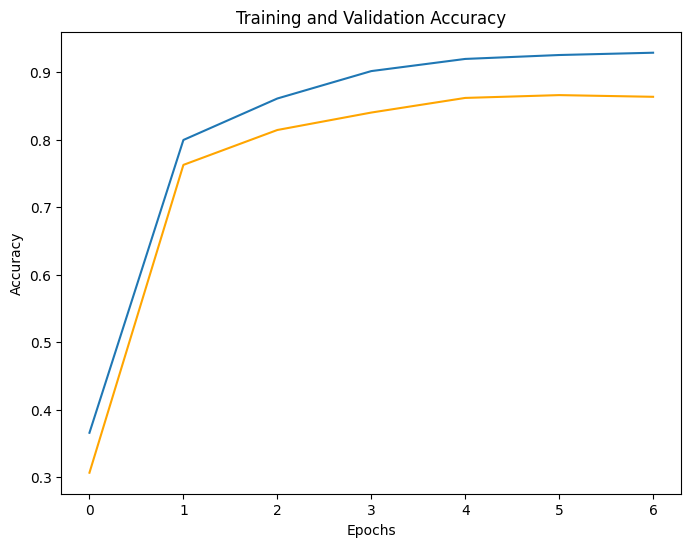

5033 1258


Epoch 1/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.864104326281614e-05]
Epoch 1 Loss: 2.7276070642471315 Train Accuracy: 0.3972             Validation Accuracy: 0.39916666666666667
Global gradient norm: 1.7201331469835122


Epoch 2/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.952989206823863e-05]
Epoch 2 Loss: 2.009639497598012 Train Accuracy: 0.7924             Validation Accuracy: 0.7741666666666667
Global gradient norm: 2.8343356506757744


Epoch 3/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.178746733646638e-05]
Epoch 3 Loss: 1.6447384222348531 Train Accuracy: 0.8622             Validation Accuracy: 0.8266666666666667
Global gradient norm: 2.655188566879881


Epoch 4/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [6.706766368180335e-05]
Epoch 4 Loss: 1.526476234992345 Train Accuracy: 0.8828             Validation Accuracy: 0.8341666666666666
Global gradient norm: 2.2456150699587303


Epoch 5/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [3.556912843420131e-05]
Epoch 5 Loss: 1.4325473022460937 Train Accuracy: 0.9104             Validation Accuracy: 0.855
Global gradient norm: 2.7553632680073554


Epoch 6/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.802221656231811e-06]
Epoch 6 Loss: 1.359048430522283 Train Accuracy: 0.924             Validation Accuracy: 0.8675
Global gradient norm: 2.4528308644127375


Epoch 7/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [8.567333007890797e-10]
Epoch 7 Loss: 1.4054518151283264 Train Accuracy: 0.9268             Validation Accuracy: 0.8641666666666666
Global gradient norm: 2.122104780952957
End of Training for maxvit Model 1-fold
best accuracy: 0.8675


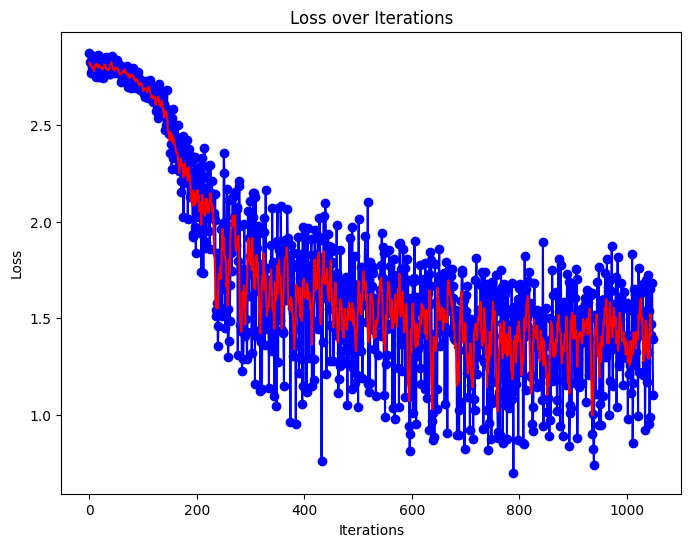

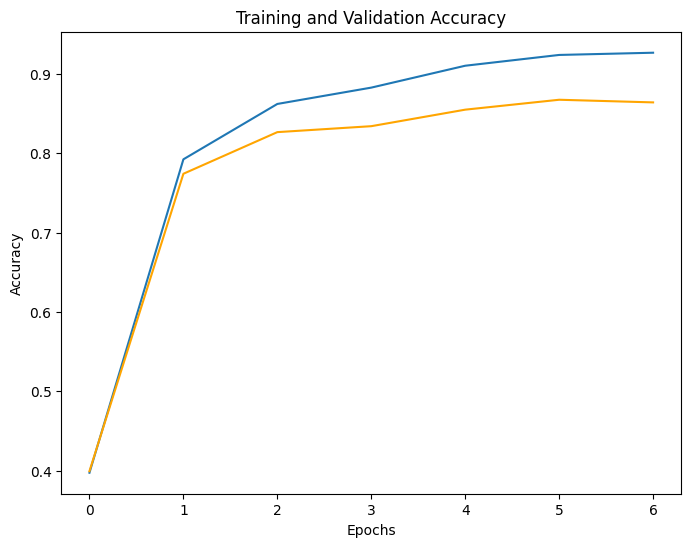

5033 1258


Epoch 1/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.864104326281614e-05]
Epoch 1 Loss: 2.7375105730692546 Train Accuracy: 0.3652             Validation Accuracy: 0.32916666666666666
Global gradient norm: 1.6218000638321919


Epoch 2/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.952989206823863e-05]
Epoch 2 Loss: 2.112179306348165 Train Accuracy: 0.7914             Validation Accuracy: 0.7775
Global gradient norm: 2.6378605706536233


Epoch 3/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.178746733646638e-05]
Epoch 3 Loss: 1.6097958823045095 Train Accuracy: 0.8564             Validation Accuracy: 0.8033333333333333
Global gradient norm: 2.1762738955019905


Epoch 4/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [6.706766368180335e-05]
Epoch 4 Loss: 1.5009818343321482 Train Accuracy: 0.9             Validation Accuracy: 0.83
Global gradient norm: 2.6601782800604887


Epoch 5/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [3.556912843420131e-05]
Epoch 5 Loss: 1.45529616634051 Train Accuracy: 0.9148             Validation Accuracy: 0.8491666666666666
Global gradient norm: 2.7914907086630336


Epoch 6/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.802221656231811e-06]
Epoch 6 Loss: 1.396403881708781 Train Accuracy: 0.9246             Validation Accuracy: 0.8416666666666667
Global gradient norm: 1.916252944425919


Epoch 7/7:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [8.567333007890797e-10]
Epoch 7 Loss: 1.3873098893960316 Train Accuracy: 0.9304             Validation Accuracy: 0.8575
Global gradient norm: 2.9025173512305584
End of Training for maxvit Model 2-fold
best accuracy: 0.8575


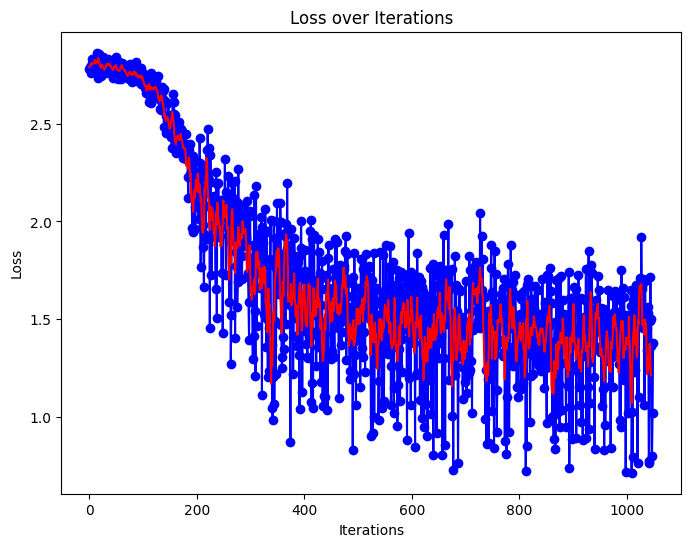

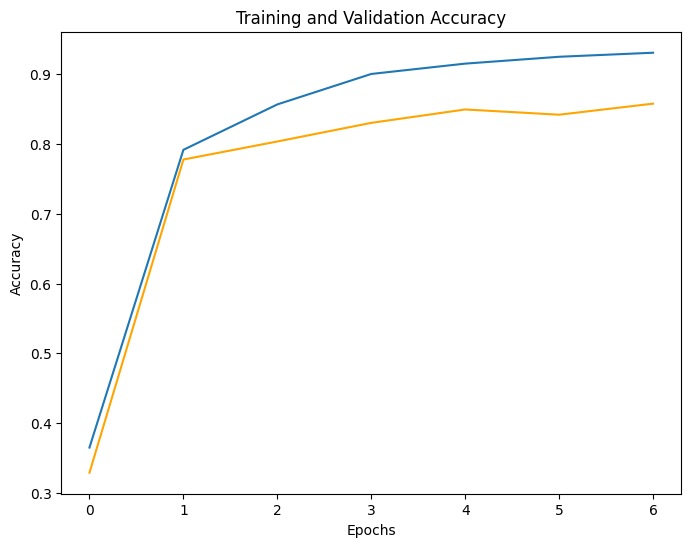

5033 1258


Epoch 1/7:   0%|          | 0/150 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [13]:
k_fold = StratifiedKFold(n_splits=5, random_state=SEED, shuffle=True)
models = ['maxvit']

# N=100
# perm_indices = np.random.permutation(N)
# X = X[perm_indices]
# y = y[perm_indices]

for model_name in models:
    current_model_accuracies = []
    for k_id, (train_i, val_i) in enumerate(k_fold.split(X,y)):
        if k_id in [0,1,2]:
            continue
        print(len(train_i), len(val_i))
        train_set = X[train_i]
        train_label_set = y[train_i]

        val_set = X[val_i]
        val_label_set = y[val_i]

        model_config = config_manager.config[model_name]
        lr = config_manager.config.lr
        num_epochs = config_manager.config.num_epochs
        num_classes = config_manager.config.num_classes

        device = 'cuda' if torch.cuda.is_available() else 'cpu'

        train_transform = create_train_transforms()
        test_transform = create_test_transforms()

        train_data = PastaData(train_set, train_label_set, transform_list=train_transform)
        train_data_accuracy = PastaData(train_set, train_label_set, transform_list=test_transform)
        val_data = PastaData(val_set, val_label_set, transform_list=test_transform)

        train_loader = DataLoader(train_data, batch_size=model_config.batch_size, shuffle=False, drop_last=True)
        train_loader_accuracy = DataLoader(train_data_accuracy, batch_size=model_config.batch_size, shuffle=False, drop_last=True)
        val_loader = DataLoader(val_data, batch_size=model_config.batch_size, shuffle=False, drop_last=True)

        model = create_model(model_name, num_classes)
        model.to(device)

        result_dir = os.path.join(GOOGLE_DRIVE_PATH, model_config.output_dir)
        os.makedirs(result_dir, exist_ok=True)

        out_file = os.path.join(result_dir, f"{model_name}_k_fold_{k_id}.pt")

        resume = False
        if os.path.exists(out_file):
            print(f"=== {out_file} exist! ===")
            resume = True

        #  need to make dataframe from images
        loss_history, train_accuracy_history, \
        val_accuracy_history, best_accuracy, model, optimizer, scaler, end_epoch = trainer(
            model,
            train_loader,
            train_loader_accuracy,
            val_loader,
            num_epochs=num_epochs,
            lr=lr,
            model_config=model_config,
            device=device,
            resume=resume,
            out_file=out_file,
            num_classes=num_classes
        )


        current_model_accuracies.append(best_accuracy)
        print(f"End of Training for {model_name} Model {k_id}-fold")
        print(f"best accuracy: {best_accuracy}")

        save_model(model, optimizer, scaler, end_epoch, out_file, best_accuracy)
        # torch.save(best_params, os.path.join(result_dir, f"{model_name}_k_fold_{k_id}.pt"))
        draw_loss(loss_history)
        draw_train_val_accuracy(train_accuracy_history, val_accuracy_history)

    print("current_model_accuracies", current_model_accuracies)


        # avg_accuracy = torch.mean(fold_accuracies)
        # std_accuracy = torch.std(fold_accuracies)

        # general plan
        # 1. save best accuracies
        # 2. compare with different models
        # 3. train on full dataset with best performing model
        # 4. make inference


In [ ]:
from pathlib import Path
import glob

In [ ]:
models = ['swin']
for model_name in models:
    model_config = config_manager.config[model_name]
    result_dir = os.path.join(GOOGLE_DRIVE_PATH, model_config.output_dir)
    output_dir = Path(result_dir)
    checkpt_paths =  glob.glob(os.path.join(output_dir, "swin_k_fold_*.pt"))
    accuracy_list = []
    for checkpt_path in checkpt_paths:
        checkpoint = torch.load(checkpt_path, map_location='cpu')
        accuracy_list.append(checkpoint["best_accuracy"])
    print("Model: ", model_name)
    print("Accuracy list: ",  accuracy_list)
    print("Accuracy Mean: ", np.mean(accuracy_list))
    print("Accuracy std: ", np.std(accuracy_list))

In [ ]:
# Inference

In [ ]:
!git pull
!git config --global user.email "tomhyhan@gmail.com"
!git config --global user.name username
!git add .
!git status
!git commit -m "updated trainer"
!git push https://{token}@github.com/{username}/{repo_name}.git